В данной работе используются данные Grammatical Facial Expressions (https://archive.ics.uci.edu/ml/datasets/Grammatical+Facial+Expressions)

Данные получены из обработки 18 видео, записанных с помощью Microsoft Kinect. В каждом видео пользователь говорит 5 предложений, используя мимику. Результат обработки - кадр видео и текстовый файл состоящий из 100 координат(x,y,z) положений носа, глаз, бровей, контура лица и радужки глаз. В каждой строке содержится один кадр видео. Изображения классфицировались вручную специалистом.

Набор данных состоит из 36 файлов: 18 файлов с точками и 18 с классификацией. Название файла отражает мимику лица. Буква 'a' или 'b' обозначает пользователя на видео. 

Координаты x и  y даны в пикселях, z в миллиметрах. 

Заголовок кадра:
* 0 - 7	(x,y,z) - левый глаз 
* 8 - 15 (x,y,z) - правый глаз 
* 16 - 25	(x,y,z) - левая бровь 
* 26 - 35	(x,y,z) - правая бровь 
* 36 - 47	(x,y,z) - нос
* 48 - 67	(x,y,z) - рот 
* 68 - 86	(x,y,z) - контур лица
* 87	(x,y,z) - левая радужка глаза 
* 88 (x,y,z) - правая радужка глаза
* 89	(x,y,z) - кончик носа 
* 90 - 94	(x,y,z) - линия над левой бровью 
* 95 - 99	(x,y,z) - линия над правой бровью

Я выбрал первые два файла a_affirmative_datapoints.txt и a_affirmative_targets.txt.

![](view_points.png)


Первым делом загружаем исходные данные. Так как они были запакованы в zip архив  на сайте, то пришлось скачать их и подгрузить из папки. Для этого использовалась функция pandas.read_csv. header=0 - первая строка используется как заголовок, na_values='0', все нулевые значения заменяются на NA для последующего поиска и обработки, delim_whitespace=True - для разделения столбцов используются пробелы.

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

X_data = pd.read_csv('b_conditional_datapoints.txt', header=0, na_values='0', delim_whitespace=True)
y_data = pd.read_csv('b_conditional_targets.txt', header=None, delim_whitespace=True)
print(X_data.shape)
print(y_data.shape)

(2034, 301)
(2034, 1)


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния. Но в связи с тем, что в данной задаче большое количество признаков (301 столбец с координатами), были выделены только некоторые.  

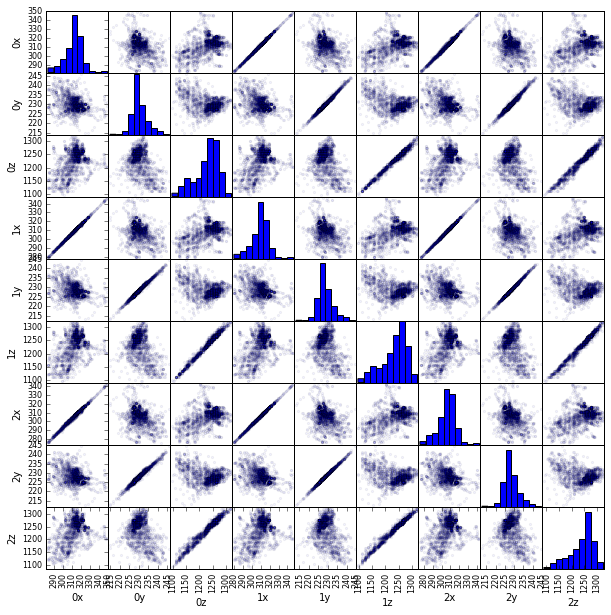

In [26]:
from pandas.tools.plotting import scatter_matrix
temp = X_data.iloc[:,list(range(1,10))]
scatter_matrix(temp, alpha=0.05, figsize=(10, 10));

Используя метод count, в последних столбцах можно заметить пропуски по данным. Можно удалить строки/столбцы с пропущенными данными, а можно заполнить средними значениями. Для этого воспользуемся методом fillna.

In [27]:
X_data.count(axis=0)
X_data = X_data.fillna(X_data.median(axis=0),axis=0)
X_data.count(axis=0)

0.0    2034
0x     2034
0y     2034
0z     2034
1x     2034
1y     2034
1z     2034
2x     2034
2y     2034
2z     2034
3x     2034
3y     2034
3z     2034
4x     2034
4y     2034
4z     2034
5x     2034
5y     2034
5z     2034
6x     2034
6y     2034
6z     2034
7x     2034
7y     2034
7z     2034
8x     2034
8y     2034
8z     2034
9x     2034
9y     2034
       ... 
90x    2034
90y    2034
90z    2034
91x    2034
91y    2034
91z    2034
92x    2034
92y    2034
92z    2034
93x    2034
93y    2034
93z    2034
94x    2034
94y    2034
94z    2034
95x    2034
95y    2034
95z    2034
96x    2034
96y    2034
96z    2034
97x    2034
97y    2034
97z    2034
98x    2034
98y    2034
98z    2034
99x    2034
99y    2034
99z    2034
dtype: int64

В связи с чувствительностью некоторых алгоритмов машинного обучения к масштабированию данных нормализуем X_data. Для этого каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [28]:
X_data = (X_data - X_data.mean())/X_data.std()
X_data.describe()

,0.0,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
count,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,...,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03,2.034000e+03
mean,6.904517e-08,2.772304e-14,-1.052609e-13,2.585062e-15,3.903793e-14,-5.604694e-14,-1.502131e-15,-8.436385e-15,-1.463005e-14,-2.375462e-16,...,2.445329e-16,8.303639e-14,-2.319569e-15,2.165863e-15,5.569761e-14,-3.635855e-14,-2.323063e-15,-1.085377e-14,1.380144e-13,-1.676797e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.718221e+00,-2.923825e+00,-3.879799e+00,-2.997394e+00,-2.958947e+00,-4.007053e+00,-2.925766e+00,-3.098015e+00,-4.087221e+00,-3.194113e+00,...,-3.034058e+00,-2.923094e+00,-3.970598e+00,-8.023852e+00,-2.915812e+00,-3.905468e+00,-8.056483e+00,-2.923460e+00,-3.746630e+00,-7.913317e+00
25%,-8.867948e-01,-5.425865e-01,-6.564495e-01,-5.481665e-01,-5.284039e-01,-6.392023e-01,-6.243342e-01,-5.191535e-01,-6.283715e-01,-5.922519e-01,...,-5.906779e-01,-4.754127e-01,-6.018520e-01,-6.030159e-01,-4.731286e-01,-6.163953e-01,-5.612838e-01,-4.612709e-01,-6.084323e-01,-5.611796e-01
50%,1.623343e-02,1.749451e-01,-1.472005e-01,2.300926e-01,1.720185e-01,-1.459008e-01,2.145055e-01,1.629450e-01,-1.206299e-01,3.461242e-01,...,2.898196e-01,6.063154e-02,-1.343015e-01,3.193480e-01,4.900339e-02,-7.721421e-02,2.876199e-01,4.467014e-02,-9.627975e-02,2.779230e-01
75%,8.450020e-01,4.897039e-01,5.117867e-01,7.565620e-01,5.149132e-01,5.169467e-01,6.876971e-01,5.334983e-01,5.146058e-01,7.513321e-01,...,6.200062e-01,5.200384e-01,5.272707e-01,7.176415e-01,5.421045e-01,5.006597e-01,5.774895e-01,5.519484e-01,5.055147e-01,6.575171e-01
max,1.782171e+00,3.751968e+00,3.971486e+00,2.084181e+00,3.737454e+00,4.105421e+00,1.849168e+00,3.705098e+00,4.279402e+00,1.796342e+00,...,2.160877e+00,3.395794e+00,3.803812e+00,2.101187e+00,3.294739e+00,3.795997e+00,2.171772e+00,3.248047e+00,3.847600e+00,2.095979e+00


Вот теперь только можно делить данные на обучающую и тестовую выборки. Для этого воспользуемся функцией train_test_split. Деление производилось в пропорции 50%:50%, 70%:30%, 30%:70%.

In [29]:
# print(X_data.shape)
# print(y_data.shape)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)
print(X_train.shape)
# print(y_test.shape)

1525 509
(1525, 301)


Выбираем метод ближайших соседей и первым делом обучаем нашу модель на данных X_train и y_train. В качестве небольшого теста, что все работате правильно и данные подготовлены нормально, количество соседей поставлено в 1. 

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делаем это с помощью метода predict. После этого смотрим разницу между предсказанными и исходными значениями. 

In [30]:
from sklearn import neighbors
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

model = neighbors.KNeighborsClassifier(n_neighbors = 50)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)
print (err_train, err_test)

0.145573770492 0.170923379175


Построим график ошибки на тестовой и тренировочной выборках от количества соседей. 

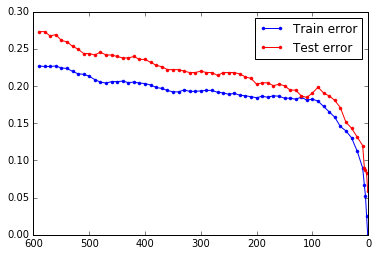

In [49]:
neighborSize = 600
k_array =  [1, 3, 5, 7] + list(range(10, neighborSize, 10))
err_train_array = []
err_test_array = []
for k in k_array:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    err_train = np.mean(y_train != y_train_pred)
    err_test = np.mean(y_test != y_test_pred)
    err_train_array.append(err_train)
    err_test_array.append(err_test)

plt.plot(k_array, err_train_array, '.-b', label = 'Train error')
plt.plot(k_array, err_test_array,  '.-r', label = 'Test error')    
plt.legend(loc = 'best')
plt.xlim([neighborSize, 0])
plt.show()

График получается достаточно странным. Странность заключается в том, что уже при n_neighbors = 1 получается минимальная тестовая ошибка. Хотя (ссылаясь на лекции) в методе ближайших соседей при малых значениях n_neighbors возникало переобучение, алгоритм отлично угадывал значения из тестовой выборки, но плохо на тренировочной. 

# Тут начинается третье задание

В предыдущем домашнем задании мы разбили выборку на тренировочную и тестовую. Теперь с обучающей выборкой проведем процедуру перекрестного контроля. 

Разобъем данные на M непересекающихся частей. Последовательно каждую из этих частей рассмотрим в качестве тестовой выборки, а
объединение остальных частей — в качестве обучающей выборки. Таким образом построим M моделей и соответственно M оценок для ошибки предсказания. В качестве окончательной оценки ошибки возьмем их среднее взвешенное. В данном задании M = 5,10
Случай LOO, когда M = N_выборки, рассматриваться не будет из-за долгого расчета. 

In [50]:
from sklearn.grid_search import GridSearchCV
k_array =  [1, 3, 5, 7] + list(range(10, neighborSize, 10))

m5_error = []
m5_std = []
m10_error = []
m10_std = []

model = neighbors.KNeighborsClassifier()

grid5 = GridSearchCV(model, param_grid={'n_neighbors': k_array}, cv=5,)
grid5.fit(X_train, y_train)
# grid5.predict(X_test)

grid10 = GridSearchCV(model, param_grid={'n_neighbors': k_array}, cv=10)
grid10.fit(X_train, y_train)
# grid10.predict(X_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

m5_std, m10_std потребуются потом для построения errorbar

In [51]:
for grid_score in grid5.grid_scores_:
    m5_error.append(1 - grid_score.mean_validation_score)
    m5_std.append(np.std(grid_score.cv_validation_scores))

for grid_score in grid10.grid_scores_:
    m10_error.append(1 - grid_score.mean_validation_score)
    m10_std.append(np.std(grid_score.cv_validation_scores))     

Зачастую метод перекрестного контроля используется для поиска оптимальных значений параметров. В данном случае минимальная ошибка достигается при n_neighbors = 1, что подтверждается графиком ошибки из предыдущего домашнего задания.

In [52]:
print(1-grid5.best_score_, grid5.best_estimator_.n_neighbors)
print(1-grid10.best_score_, grid10.best_estimator_.n_neighbors)

0.06229508196721312 1
0.05508196721311476 1


Строим графики

(600, 0)

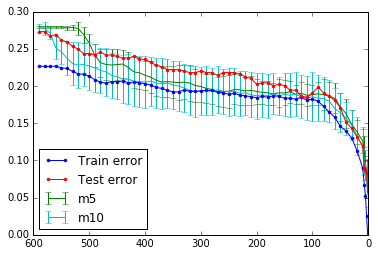

In [53]:
plt.figure(0)
plt.errorbar(k_array, m5_error, yerr=m5_std, color='g', label='m5')
plt.errorbar(k_array, m10_error, yerr=m10_std, color='c', label='m10')
plt.plot(k_array, err_train_array, '.-b', label = 'Train error')
plt.plot(k_array, err_test_array,  '.-r', label = 'Test error')    
plt.legend(loc = 'best')

plt.xlim([neighborSize, 0])

Теперь попробуем тоже самое, но с другой метрикой. 

(600, 0)

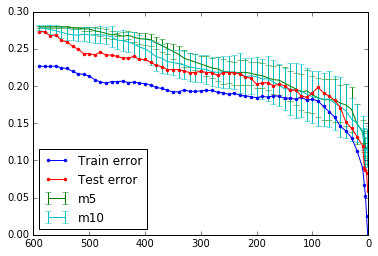

In [54]:
model = neighbors.KNeighborsClassifier(metric='chebyshev')

m5_error = []
m5_std = []
m10_error = []
m10_std = []

grid5 = GridSearchCV(model, param_grid={'n_neighbors': k_array}, cv=5,)
grid5.fit(X_train, y_train)

grid10 = GridSearchCV(model, param_grid={'n_neighbors': k_array}, cv=10)
grid10.fit(X_train, y_train)

for grid_score in grid5.grid_scores_:
    m5_error.append(1 - grid_score.mean_validation_score)
    m5_std.append(np.std(grid_score.cv_validation_scores))

for grid_score in grid10.grid_scores_:
    m10_error.append(1 - grid_score.mean_validation_score)
    m10_std.append(np.std(grid_score.cv_validation_scores)) 

plt.figure(0)
plt.errorbar(k_array, m5_error, yerr=m5_std, color='g', label='m5')
plt.errorbar(k_array, m10_error, yerr=m10_std, color='c', label='m10')
plt.plot(k_array, err_train_array, '.-b', label = 'Train error')
plt.plot(k_array, err_test_array,  '.-r', label = 'Test error')    
plt.legend(loc = 'best')

plt.xlim([neighborSize, 0])